# Project: Investigate patients no-show appointments

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

This dataset collects information from 100k medical appointments in Brazil and is focused on the question of whether or not patients show up for their appointment. 

### Given features are:
<ul>   
    <li> Patient ID </li>
    <li> Appointment ID </li>
    <li> Gender: Patient gender,  Categorical (Nomial)</li> 
    <li> Age: Patient age,  Quantative</li>
    <li> Appointment Day: Day of visit, Quantative</li>
    <li> Scheduled Day: Day of call to register, Quantative</li>
    <li> Neighbourhood: Hospital Location Categorical (Nominal)</li>
    <li> Scholarship: whether or not the patient is enrolled in Brasilian welfare program, Categorical </li>
    <li> 4 features(Hipertension, Diabetes, Alcoholism, Handcape): true/false , Categorical </li>
    <li> sms_received: whether or not confirmation message is sent to the patient, Categorical </li>
    <li> no-show up: show patient commitment, Categorical (Yes --> uncommitted), (No --> committed) </li>
</ul>


### After Analysis, we want to answer some Questions such as:
<ol>
    <li> Under different conditions, What are the proportion of uncommitted patients ? </li> 
    <li> For how long Sms can affect patient commitment ? </li>
    <li> What features are helpful to predict patient commitment ? </li>
<ol>

In [1]:
# import statements 
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt
%matplotlib inline

<a id='wrangling'></a>
## Data Wrangling


### General Properties

### Data Gathering 

In [2]:
# Load dataframe and print out a few lines
df = pd.read_csv('data-patient-no-show-appointment.csv')
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


### Data Assessing 

#### search for missing data and incorrect data types

In [3]:
# dataframe summary
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110527 entries, 0 to 110526
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   PatientId       110527 non-null  float64
 1   AppointmentID   110527 non-null  int64  
 2   Gender          110527 non-null  object 
 3   ScheduledDay    110527 non-null  object 
 4   AppointmentDay  110527 non-null  object 
 5   Age             110527 non-null  int64  
 6   Neighbourhood   110527 non-null  object 
 7   Scholarship     110527 non-null  int64  
 8   Hipertension    110527 non-null  int64  
 9   Diabetes        110527 non-null  int64  
 10  Alcoholism      110527 non-null  int64  
 11  Handcap         110527 non-null  int64  
 12  SMS_received    110527 non-null  int64  
 13  No-show         110527 non-null  object 
dtypes: float64(1), int64(8), object(5)
memory usage: 11.8+ MB


In [4]:
#unique values for each feature
df.nunique()

PatientId          62299
AppointmentID     110527
Gender                 2
ScheduledDay      103549
AppointmentDay        27
Age                  104
Neighbourhood         81
Scholarship            2
Hipertension           2
Diabetes               2
Alcoholism             2
Handcap                5
SMS_received           2
No-show                2
dtype: int64

#### show data distribution and some statistics.

In [5]:
# some statistics about data
df.describe()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
count,1.105270e+05,1.105270e+05,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000,110527.000000
mean,1.474963e+14,5.675305e+06,37.088874,0.098266,0.197246,0.071865,0.030400,0.022248,0.321026
std,2.560949e+14,7.129575e+04,23.110205,0.297675,0.397921,0.258265,0.171686,0.161543,0.466873
min,3.921784e+04,5.030230e+06,-1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4.172614e+12,5.640286e+06,18.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.173184e+13,5.680573e+06,37.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,9.439172e+13,5.725524e+06,55.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,9.999816e+14,5.790484e+06,115.000000,1.000000,1.000000,1.000000,1.000000,4.000000,1.000000


#### search for duplicates

In [6]:
# search for duplicates
df.duplicated().sum()

0

#### At first sight
<ul> 
    <li>There is no missing data</li>
    <li>ScheduledDay and Appointmentday have icorrect data types </li>
    <li>Some columns may be dropped</li>
    <li>Some of columns labels may be renamed</li>
    <li>There is data errors in 'age' and 'handcap' feature</li>
    <li>There is no duplicates</li>
</ul>

## Data Cleaning 

#### Drop useless column -->  PatientId, AppointmentID won't be used  to answer our questions 

In [7]:
# drop useless columns 
df.drop(columns = ['PatientId', 'AppointmentID'], inplace=True)
df.head()

,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Remane cloumns  --> convert them to lowercase and replace '-' with '_'

In [8]:
# convert columns labels to lowercase and replace '-' with '_'
df.rename(columns = lambda x: x.lower().replace('-', '_'), inplace=True)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


#### Quantify the problem of age of '-1' and drop records if it has no effect on anlaysis
> **Note**: patients with age = 0 are patients who are less than one year old

In [9]:
# from dataframe statistics age of -1, let's find its count to determine how to solve this problem
df.age.value_counts()

 0      3539
 1      2273
 52     1746
 49     1652
 53     1651
        ... 
 115       5
 100       4
 102       2
 99        1
-1         1
Name: age, Length: 104, dtype: int64

#### The same for 'handcap'

In [10]:
df.handcap.value_counts()

0    108286
1      2042
2       183
3        13
4         3
Name: handcap, dtype: int64

In [11]:
# There is only one record with age = -1 which has no effect on the resutls
# There is little records with handcap not 0 or 1
# drop row in which age is -1 or handcap > 1
df = df[(df.age != -1) & (df.handcap <= 1)]
df.shape

(110327, 12)

In [12]:
# make sure that no record has age = -1 
df[df.age == -1 ]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


In [13]:
# make sure that no record has handcap > 1
df[df.handcap > 1 ]

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show


#### Convert scheduledday and a appointmentday from object  to time_date format
   #### Make it easier --> extract only dates and ignore time  

In [14]:
# convert scheduledday and a appointmentday from object  to time date format
df.appointmentday = pd.to_datetime(df.appointmentday)
df.scheduledday = pd.to_datetime(df.scheduledday)
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [15]:
# make sure that they are correctly converted
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype              
---  ------          --------------   -----              
 0   gender          110327 non-null  object             
 1   scheduledday    110327 non-null  datetime64[ns, UTC]
 2   appointmentday  110327 non-null  datetime64[ns, UTC]
 3   age             110327 non-null  int64              
 4   neighbourhood   110327 non-null  object             
 5   scholarship     110327 non-null  int64              
 6   hipertension    110327 non-null  int64              
 7   diabetes        110327 non-null  int64              
 8   alcoholism      110327 non-null  int64              
 9   handcap         110327 non-null  int64              
 10  sms_received    110327 non-null  int64              
 11  no_show         110327 non-null  object             
dtypes: datetime64[ns, UTC](2), int64(7), object(3)
memory usage: 10.9+ MB


In [16]:
# extract date from datetime 
df.appointmentday = df.appointmentday.dt.date
df.scheduledday = df.scheduledday.dt.date
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [17]:
# check data types again
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   gender          110327 non-null  object
 1   scheduledday    110327 non-null  object
 2   appointmentday  110327 non-null  object
 3   age             110327 non-null  int64 
 4   neighbourhood   110327 non-null  object
 5   scholarship     110327 non-null  int64 
 6   hipertension    110327 non-null  int64 
 7   diabetes        110327 non-null  int64 
 8   alcoholism      110327 non-null  int64 
 9   handcap         110327 non-null  int64 
 10  sms_received    110327 non-null  int64 
 11  no_show         110327 non-null  object
dtypes: int64(7), object(5)
memory usage: 10.9+ MB


In [18]:
# reconvert scheduledday and appointmentday  to date_time
df.appointmentday = pd.to_datetime(df.appointmentday)
df.scheduledday = pd.to_datetime(df.scheduledday)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110327 entries, 0 to 110526
Data columns (total 12 columns):
 #   Column          Non-Null Count   Dtype         
---  ------          --------------   -----         
 0   gender          110327 non-null  object        
 1   scheduledday    110327 non-null  datetime64[ns]
 2   appointmentday  110327 non-null  datetime64[ns]
 3   age             110327 non-null  int64         
 4   neighbourhood   110327 non-null  object        
 5   scholarship     110327 non-null  int64         
 6   hipertension    110327 non-null  int64         
 7   diabetes        110327 non-null  int64         
 8   alcoholism      110327 non-null  int64         
 9   handcap         110327 non-null  int64         
 10  sms_received    110327 non-null  int64         
 11  no_show         110327 non-null  object        
dtypes: datetime64[ns](2), int64(7), object(3)
memory usage: 10.9+ MB


#### search for duplicates again, drop if exist

In [19]:
# search for duplicates
df.duplicated().sum()

8062

In [20]:
# drop duplicates 
df.drop_duplicates(inplace=True)

### Calculate days before visit appointment, for two reasons
    1 - Check for errors (if appointment day is before scheduled day)
    2 - To study number of days before appoinments effect on no-show appointments

In [21]:
# calculalte duration between appointment day (day to visit) and scheduled day (day of call)
df['days_before_app'] = df['appointmentday'] - df['scheduledday']
df.head()

,gender,scheduledday,appointmentday,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,no_show,days_before_app
0,F,2016-04-29,2016-04-29,62,JARDIM DA PENHA,0,1,0,0,0,0,No,0 days
1,M,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,0,0,0,0,0,No,0 days
2,F,2016-04-29,2016-04-29,62,MATA DA PRAIA,0,0,0,0,0,0,No,0 days
3,F,2016-04-29,2016-04-29,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No,0 days
4,F,2016-04-29,2016-04-29,56,JARDIM DA PENHA,0,1,1,0,0,0,No,0 days


In [22]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102265 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype          
---  ------           --------------   -----          
 0   gender           102265 non-null  object         
 1   scheduledday     102265 non-null  datetime64[ns] 
 2   appointmentday   102265 non-null  datetime64[ns] 
 3   age              102265 non-null  int64          
 4   neighbourhood    102265 non-null  object         
 5   scholarship      102265 non-null  int64          
 6   hipertension     102265 non-null  int64          
 7   diabetes         102265 non-null  int64          
 8   alcoholism       102265 non-null  int64          
 9   handcap          102265 non-null  int64          
 10  sms_received     102265 non-null  int64          
 11  no_show          102265 non-null  object         
 12  days_before_app  102265 non-null  timedelta64[ns]
dtypes: datetime64[ns](2), int64(7), object(3), timedelta64[ns](

In [23]:
# convert timedelta64[ns] to integer
df.days_before_app = df.days_before_app.astype('timedelta64[D]')
df['days_before_app'] = df.days_before_app.astype(int)

In [24]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 102265 entries, 0 to 110526
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   gender           102265 non-null  object        
 1   scheduledday     102265 non-null  datetime64[ns]
 2   appointmentday   102265 non-null  datetime64[ns]
 3   age              102265 non-null  int64         
 4   neighbourhood    102265 non-null  object        
 5   scholarship      102265 non-null  int64         
 6   hipertension     102265 non-null  int64         
 7   diabetes         102265 non-null  int64         
 8   alcoholism       102265 non-null  int64         
 9   handcap          102265 non-null  int64         
 10  sms_received     102265 non-null  int64         
 11  no_show          102265 non-null  object        
 12  days_before_app  102265 non-null  int32         
dtypes: datetime64[ns](2), int32(1), int64(7), object(3)
memory usage: 10.5+ MB

#### check errors (if appointment day is before scheduled day, i.e. if days are negative) 

In [25]:
# stats. of days_before appointment
df.days_before_app.describe()

count    102265.000000
mean         10.636200
std          15.420344
min          -6.000000
25%           0.000000
50%           4.000000
75%          15.000000
max         179.000000
Name: days_before_app, dtype: float64

#### Find the number of records in which days before appointment is -ve

In [26]:
df[df.days_before_app < 0].shape, df.shape

((5, 13), (102265, 13))

In [27]:
#drop records with -ve days
df = df[df.days_before_app >= 0]

#### Now, we don't need  scheduledday or appointmentday, let's drop them

In [28]:
df.drop(columns = ['scheduledday', 'appointmentday'], inplace=True)

#### search for duplicates again and drop if exist

In [29]:
df.duplicated().sum()

24173

In [30]:
df.drop_duplicates(inplace=True)
df.duplicated().sum()

0

#### rearrange columns to make no_show last column

In [31]:
df.shape

(78087, 11)

In [32]:
df = df.iloc[:, np.r_[0:9, 10, 9]]
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_before_app,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,No


### Check dataframe before saving it to a new file

In [33]:
df.head()

,gender,age,neighbourhood,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_before_app,no_show
0,F,62,JARDIM DA PENHA,0,1,0,0,0,0,0,No
1,M,56,JARDIM DA PENHA,0,0,0,0,0,0,0,No
2,F,62,MATA DA PRAIA,0,0,0,0,0,0,0,No
3,F,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0,No
4,F,56,JARDIM DA PENHA,0,1,1,0,0,0,0,No


In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 78087 entries, 0 to 110526
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           78087 non-null  object
 1   age              78087 non-null  int64 
 2   neighbourhood    78087 non-null  object
 3   scholarship      78087 non-null  int64 
 4   hipertension     78087 non-null  int64 
 5   diabetes         78087 non-null  int64 
 6   alcoholism       78087 non-null  int64 
 7   handcap          78087 non-null  int64 
 8   sms_received     78087 non-null  int64 
 9   days_before_app  78087 non-null  int32 
 10  no_show          78087 non-null  object
dtypes: int32(1), int64(7), object(3)
memory usage: 6.9+ MB


In [35]:
df.to_csv('data_clean.csv', index=False)

<a id='eda'></a>
## Exploratory Data Analysis

In [36]:
#load df from data_clean file
df = pd.read_csv('data_clean.csv')

In [37]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78087 entries, 0 to 78086
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   gender           78087 non-null  object
 1   age              78087 non-null  int64 
 2   neighbourhood    78087 non-null  object
 3   scholarship      78087 non-null  int64 
 4   hipertension     78087 non-null  int64 
 5   diabetes         78087 non-null  int64 
 6   alcoholism       78087 non-null  int64 
 7   handcap          78087 non-null  int64 
 8   sms_received     78087 non-null  int64 
 9   days_before_app  78087 non-null  int64 
 10  no_show          78087 non-null  object
dtypes: int64(8), object(3)
memory usage: 6.6+ MB


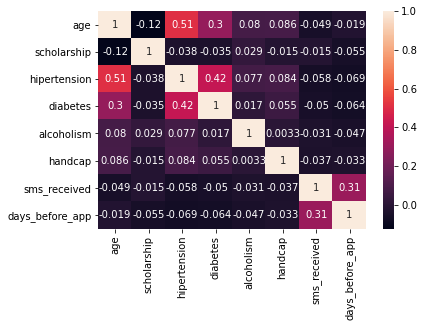

In [38]:
#correlation matrix
sn.heatmap(df.corr(), annot=True)
plt.show()

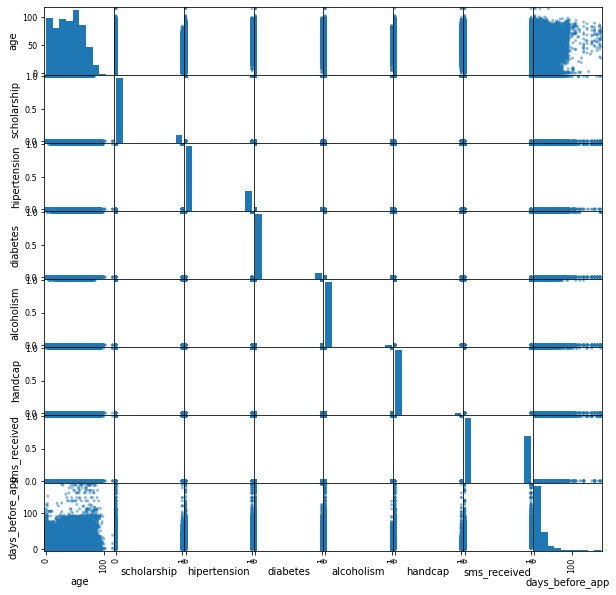

In [39]:
#scatter matrix
pd.plotting.scatter_matrix(df, figsize=(10, 10));

## Q1: Under different conditions, what is the proportion of uncommitted patients ?
> Proportion of uncommitted patients = number of uncommitted patients / total number of patient


In [40]:
# len() function is used to get the number of dataframe
len(df[df.no_show == 'Yes']) / len(df)

0.2614647764672737

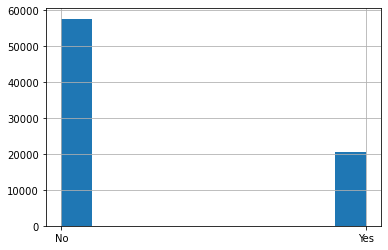

In [41]:
# Histogram to compare number of committed vs uncommitted patient  
df.no_show.hist();

### A1: proportion of uncommitted patients under different conditions is about 26 %

## Q2: For how long  sms affect patient committement  ?
> p1 = proportion of committed patient in case of sms is received =
        num of committed sms_received patient / total num of sms_received patients 

> p2 = proportion of committed patient in case of sms is not received =
        num of committed not sms_received patient / total num of not sms_received patients 

> effect = p2 / p1

In [42]:
p1 = len(df[(df.sms_received == 0) & (df.no_show == 'No')]) / len(df[df.sms_received == 0])
p1

0.7571560887399109

In [43]:
p2 = len(df[(df.sms_received == 1) & (df.no_show == 'No')])/ len(df[df.sms_received == 1])
p2

0.7127454873094896

In [44]:
sms_effect = p2 / p1
sms_effect

0.9413455137046693

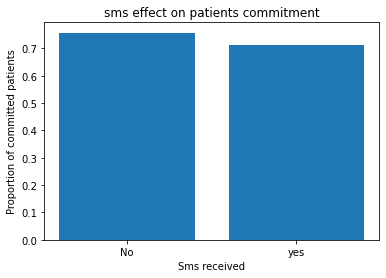

In [45]:
plt.bar(["No", "yes"], [p1, p2])
plt.title("sms effect on patients commitment")
plt.xlabel("Sms received")
plt.ylabel("Proportion of committed patients");

### A2: It seems that sms has a negative effect on patients commitment,  It is a cost with negative outcome

## Q3:  What features are helpful to predict patient commitment ? 

In [46]:
# stats about all data
df.describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_before_app
count,78087.000000,78087.000000,78087.000000,78087.000000,78087.000000,78087.000000,78087.000000,78087.000000
mean,39.080039,0.109404,0.229859,0.086096,0.031478,0.020938,0.419289,13.319515
std,22.959803,0.312147,0.420745,0.280508,0.174606,0.143178,0.493446,16.337427
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,20.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
50%,39.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,7.000000
75%,57.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,20.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [47]:
# stats about uncommitted patient characteristics
df[df.no_show == 'Yes'].describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_before_app
count,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000,20417.000000
mean,34.823138,0.117794,0.175883,0.067444,0.031493,0.015232,0.460646,16.360729
std,21.925887,0.322372,0.380730,0.250795,0.174651,0.122479,0.498461,16.733734
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000
50%,33.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,12.000000
75%,51.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,24.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


In [48]:
# stats about committed patient characteristics
df[df.no_show == 'No'].describe()

,age,scholarship,hipertension,diabetes,alcoholism,handcap,sms_received,days_before_app
count,57670.000000,57670.000000,57670.000000,57670.000000,57670.000000,57670.000000,57670.000000,57670.000000
mean,40.587116,0.106433,0.248968,0.092700,0.031472,0.022958,0.404647,12.242830
std,23.127996,0.308394,0.432419,0.290014,0.174592,0.149772,0.490828,16.057474
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,21.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,42.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000
75%,59.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,18.000000
max,115.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,179.000000


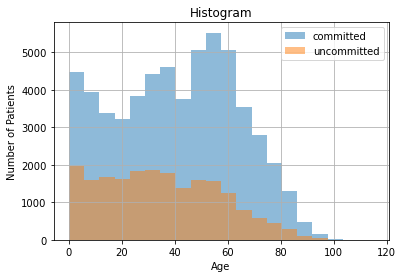

In [49]:
df.age[df.no_show == 'No'].hist(alpha = 0.5, bins = 20, label = 'committed');
df.age[df.no_show == 'Yes'].hist(alpha = 0.5, bins = 20, label = 'uncommitted');
plt.title("Histogram");
plt.xlabel("Age");
plt.ylabel("Number of Patients");
plt.legend();

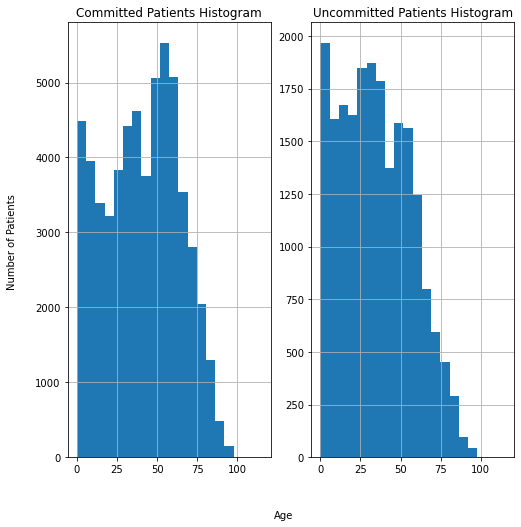

In [50]:
fig, axes= plt.subplots(1, 2)
df.age[df.no_show == 'No'].hist(bins = 20, label = 'committed', ax=axes[0], figsize=(8, 8));
df.age[df.no_show == 'Yes'].hist(bins = 20, label = 'uncommitted', ax=axes[1], figsize=(8, 8));
axes[0].set_title("Committed Patients Histogram");
axes[1].set_title("Uncommitted Patients Histogram");
fig.text(0.5, 0.02, 'Age', ha='center');
fig.text(0.02, 0.5, 'Number of Patients', va='center', rotation='vertical');

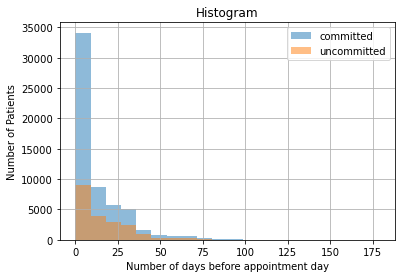

In [51]:
df.days_before_app[df.no_show == 'No'].hist(alpha = 0.5, bins = 20, label = 'committed');
df.days_before_app[df.no_show == 'Yes'].hist(alpha = 0.5, bins = 20, label = 'uncommitted');
plt.title("Histogram");
plt.xlabel("Number of days before appointment day");
plt.ylabel("Number of Patients");
plt.legend();
plt.legend();

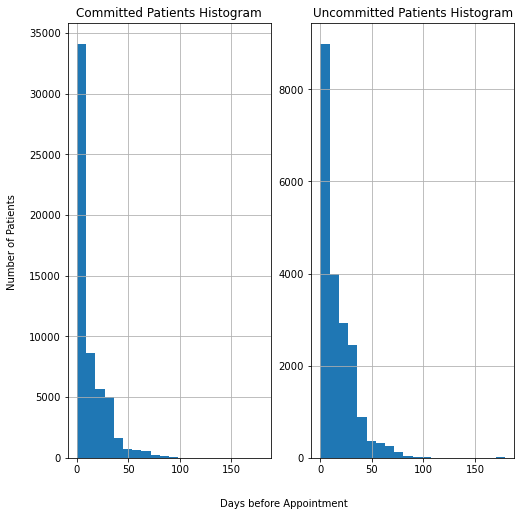

In [52]:
fig, axes= plt.subplots(1, 2)
df.days_before_app[df.no_show == 'No'].hist(bins = 20, label = 'committed', ax=axes[0], figsize=(8, 8));
df.days_before_app[df.no_show == 'Yes'].hist(bins = 20, label = 'uncommitted', ax=axes[1], figsize=(8, 8));
axes[0].set_title("Committed Patients Histogram");
axes[1].set_title("Uncommitted Patients Histogram");
fig.text(0.5, 0.04, 'Days before Appointment', ha='center');
fig.text(0.02, 0.5, 'Number of Patients', va='center', rotation='vertical');

### A3: it seems that (age) and (days_before_app) may have the major effect on patient commitment
> Older patients are more committed, and fewer days before appointment may increase the chance of commitment 

<a id='conclusions'></a>
## Conclusions
><b>Results</b>: Form dataset of patient no show appointment we can conclude that:<ul>
    <li> Under different conditions, proportion of patients don't show up to their commitment is about 26% </li>
    <li> Most of patient aren't enrolled in Brasilian welfare program </li>
    <li> Hospitals can save money and don't send sms to patients </li>
    <li> Older patients are more committed to their appoinments</li>
    <li> Fewer days between day of registeriation call and appointment day has a good effect on patient commitment</li>
</ul>

><b>Limitations</b>:<ul>
    <li> Most of variables are categorical, so we cannot show strong correlation between factors </li>
    <li> Statistics used in our analysis are descriptive not inferential which means that we did not create inferences with our data </li>
    <li> factors details are too few, which does not allow to draw conclusions</li>
</ul>